In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, zero_one_loss, ConfusionMatrixDisplay, roc_auc_score, roc_curve, \
    confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

### Importing the training, test and validation sets

In [2]:
# Loading the datasets
training_set_X = pd.read_csv('training_set_X.csv').to_numpy()
training_set_Y = pd.read_csv('training_set_Y.csv').to_numpy().ravel()
test_set_X = pd.read_csv('test_set_X.csv').to_numpy()
test_set_Y = pd.read_csv('test_set_Y.csv').to_numpy().ravel()

# Save feature names because standardScaler removes them
feature_names = pd.read_csv('LendingClub_processed.csv', nrows=1).columns.tolist()
feature_names.remove('loan_status')
feature_names = np.array(feature_names)

print("Total amount of features: " + str(len(feature_names)))
print("Training set: " + " X: " + str(training_set_X.shape) + ";  Y: "+str(training_set_Y.shape))
print("Test set: " + " X: " + str(test_set_X.shape) + ";  Y: "+str(test_set_Y.shape))

Total amount of features: 53
Training set:  X: (92722, 53);  Y: (92722,)
Test set:  X: (39738, 53);  Y: (39738,)


In [3]:
# Loading the data dictionary
pd.set_option('max_colwidth', 1200) # controls output width; might need adjustment
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

data_dictionary = data_dictionary[data_dictionary['name'].isin(feature_names)]
data_dictionary

,name,description
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


### The features used

In [4]:
# regression_important_features = [4,1,0,13,16,39,36,15,32,2]
# rand_forest_important_features = [2,4,13,3,33,51,34,27,5,11]

# Using the most important features found by regression:
important_features = [4,1,0,13,16,39,36,15,32,2]

# Feature names:
important_features_names = list(map(lambda x: feature_names[x], important_features))

# Feature descriptions:
descriptions = list(map(lambda x: data_dictionary[data_dictionary["name"]==x].description.iloc[0], important_features_names))
important_features_descriptions = pd.DataFrame({'name': important_features_names, 'description': descriptions})[['name', 'description']]

# Selecting only the 10 most important features from the datasets:
train_set_X_important_f = training_set_X[:, important_features]
test_set_X_important_f = test_set_X[:, important_features]

print("Datasets shape only considering the 10 most important features: ")
print("Training set: " + " X: " + str(train_set_X_important_f.shape) + ";  Y: "+str(training_set_Y.shape))
print("Test set: " + " X: " + str(test_set_X_important_f.shape) + ";  Y: "+str(test_set_Y.shape))

print('\nThe', len(important_features),'most important features chosen: ')
important_features_descriptions

Datasets shape only considering the 10 most important features: 
Training set:  X: (92722, 10);  Y: (92722,)
Test set:  X: (39738, 10);  Y: (39738,)

The 10 most important features chosen: 


,name,description
0,sub_grade,LC assigned loan subgrade
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
4,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
5,mort_acc,Number of mortgage accounts.
6,mo_sin_old_rev_tl_op,Months since oldest revolving account opened
7,earliest_cr_line,The month the borrower's earliest reported credit line was opened
8,acc_open_past_24mths,Number of trades opened in past 24 months.
9,int_rate,Interest Rate on the loan


### Function used in the previous assignments that displays confidence matrix, roc curve and other metrics for different thresholds

In [5]:
pd.set_option('display.expand_frame_repr', False)  # printing dataframe width limit

def model_performance(predict_prob, thresholds):
    """
    Displays confidence matrix, roc curve and different metrics for a list of thresholds.
    """
    # DF to store results:
    results = pd.DataFrame(
        columns=["THRESHOLD", "accuracy", "true pos rate", "precision", "AUC-score"])
    roc_points = np.zeros((len(thresholds), 2))

    for idx, i in enumerate(thresholds):
        # If prob for test set > threshold predict 1
        preds = np.where(predict_prob > i, 1, 0)

        # create confusion matrix [[TN, FP], [FN, TP]]
        cm = (confusion_matrix(test_set_Y, preds, labels=[0, 1], sample_weight=None) / len(test_set_Y))

        print('Confusion matrix for threshold =', i, '\n', cm, '\n')

        TN, FP, FN, TP = cm.ravel()

        # DF to store results:
        fpr = FP / (FP + TN)
        tpr = recall_score(test_set_Y, preds)
        results['THRESHOLD'] = thresholds
        results.iloc[idx, 1] = accuracy_score(test_set_Y, preds)
        results.iloc[idx, 2] = tpr  # True positive rate
        results.iloc[idx, 3] = precision_score(test_set_Y, preds)
        results.iloc[idx, 4] = roc_auc_score(test_set_Y, preds)  # AUC score

        # Markers on the roc plot
        roc_points[idx, 0] = fpr
        roc_points[idx, 1] = tpr

    print('METRICS:')
    print(results.T)

    # Plot ROC and compute AUC: (part of code taken from the book)
    ns_prob = [0 for _ in range(len(test_set_Y))]
    ns_fpr, ns_tpr, _ = roc_curve(test_set_Y, ns_prob)
    lr_fpr, lr_tpr, _ = roc_curve(test_set_Y, predict_prob)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Tree Model')

    for idx, t in enumerate(thresholds):
        if idx == 0:
            plt.scatter(roc_points[idx, 0], roc_points[idx, 1], color='green', s=50, marker='x', zorder=2,
                        label='Thresholds')
        else:
            plt.scatter(roc_points[idx, 0], roc_points[idx, 1], color='green', s=50, marker='x', zorder=2)
        plt.text(roc_points[idx, 0] - 0.02, roc_points[idx, 1] + 0.02, str(thresholds[idx]))

    plt.title('ROC curve')
    plt.grid(False)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    return

## Training a neural network with a single hidden layer

In [6]:
ann_1_layer = MLPClassifier(solver='adam', hidden_layer_sizes=(10,), learning_rate_init= 0.001, max_iter=500, 
                            activation='logistic', alpha=0.01, random_state=1)  # alpha is the L2 regularization term
ann_1_layer.fit(train_set_X_important_f, training_set_Y)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(10,),
 max_iter=500, random_state=1) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. MLPClassifier MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(10,),
 max_iter=500, random_state=1)

Confusion matrix for threshold = 0.5 
 [[0.02307615 0.20630127]
 [0.01640747 0.75421511]] 

Confusion matrix for threshold = 0.6 
 [[0.05868438 0.17069304]
 [0.05883537 0.71178721]] 

Confusion matrix for threshold = 0.7 
 [[0.10632141 0.12305602]
 [0.15176909 0.61885349]] 

Confusion matrix for threshold = 0.75 
 [[0.13820524 0.09117218]
 [0.22784237 0.54278021]] 

Confusion matrix for threshold = 0.8 
 [[0.16915798 0.06021944]
 [0.33308169 0.43754089]] 

Confusion matrix for threshold = 0.85 
 [[0.19782073 0.0315567 ]
 [0.46617847 0.30444411]] 

METRICS:
                      0         1         2         3         4         5
THRESHOLD           0.5       0.6       0.7      0.75       0.8      0.85
accuracy       0.777291  0.770472  0.725175  0.680985  0.606699  0.502265
true pos rate  0.978709  0.923652  0.803057   0.70434  0.567776  0.395063
precision      0.785218  0.806576  0.834136  0.856185  0.879019  0.906081
AUC-score      0.539656  0.589747  0.633289  0.653432  0.652621  0.

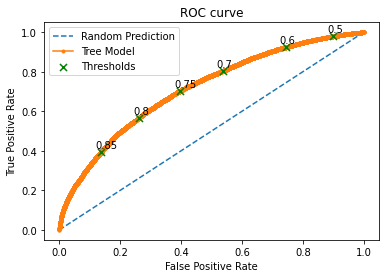

In [7]:
# Prediction probabilities on the test set:
predictions_prob = ann_1_layer.predict_proba(test_set_X[:, important_features])[:,1]

# Performance of the model:
model_performance(predict_prob = predictions_prob, thresholds=[.5, .6, .7, .75, .80, .85])

# **Refining the model**

### Testing with different architectures (different combinations of hidden layers and nodes)

In [8]:
ann_multi_layer = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), learning_rate_init= 0.001, max_iter=500, 
                            activation='logistic', alpha=0.001, random_state=1)

# hidden_layers = [(100,), (130,), (160,), (100, 100), (100, 130), (100, 160), (130, 130), (130, 160), (160, 160),
#                  (100, 100, 100), (100, 100, 130), (100, 130, 130), (130, 130, 130), (130, 160, 160), (160, 160, 160)]

hidden_layers = [(5,), (5,5), (5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(20,20,20),(30,),(30,30),(30,30,30)]

for layer in hidden_layers:
    ann_multi_layer.set_params(hidden_layer_sizes=layer)

    ann_multi_layer.fit(train_set_X_important_f, training_set_Y)

    print("ANN with ",len(layer), "layers, hidden neurons on each level = ",layer," and accuracy : ", ann_multi_layer.score(test_set_X_important_f, test_set_Y))

ANN with  1 layers, hidden neurons on each level =  (5,)  and accuracy :  0.7775680708641602
ANN with  2 layers, hidden neurons on each level =  (5, 5)  and accuracy :  0.7765614776787961
ANN with  3 layers, hidden neurons on each level =  (5, 5, 5)  and accuracy :  0.7773667522270874
ANN with  1 layers, hidden neurons on each level =  (10,)  and accuracy :  0.7780965322864765
ANN with  2 layers, hidden neurons on each level =  (10, 10)  and accuracy :  0.777517741204892
ANN with  3 layers, hidden neurons on each level =  (10, 10, 10)  and accuracy :  0.7776938950123308
ANN with  1 layers, hidden neurons on each level =  (20,)  and accuracy :  0.7782475212642811
ANN with  2 layers, hidden neurons on each level =  (20, 20)  and accuracy :  0.7777945543308672
ANN with  3 layers, hidden neurons on each level =  (20, 20, 20)  and accuracy :  0.7782475212642811
ANN with  1 layers, hidden neurons on each level =  (30,)  and accuracy :  0.7776184005234285
ANN with  2 layers, hidden neurons on

### The best model by accuracy

Confusion matrix for threshold = 0.5 
 [[0.02901505 0.20036237]
 [0.02139011 0.74923247]] 

Confusion matrix for threshold = 0.6 
 [[0.06708944 0.16228799]
 [0.07051185 0.70011073]] 

Confusion matrix for threshold = 0.7 
 [[0.11651316 0.11286426]
 [0.17237908 0.59824349]] 

Confusion matrix for threshold = 0.75 
 [[0.14562887 0.08374855]
 [0.24991192 0.52071065]] 

Confusion matrix for threshold = 0.8 
 [[0.17429161 0.05508581]
 [0.35218179 0.41844079]] 

Confusion matrix for threshold = 0.85 
 [[0.19993457 0.02944285]
 [0.47833308 0.2922895 ]] 

METRICS:
                      0         1         2         3         4         5
THRESHOLD           0.5       0.6       0.7      0.75       0.8      0.85
accuracy       0.778248    0.7672  0.714757   0.66634  0.592732  0.492224
true pos rate  0.972243    0.9085  0.776312  0.675701  0.542991   0.37929
precision      0.789002  0.811818  0.841284  0.861449  0.883669  0.908487
AUC-score      0.549369  0.600493  0.642133  0.655294  0.651418  0.

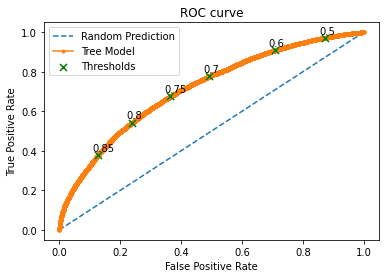

In [9]:
# Best model has one hidden layer with 20 nodes
ann_best = MLPClassifier(solver='adam', hidden_layer_sizes=(20,), learning_rate_init= 0.001, max_iter=500, 
                            activation='logistic', alpha=0.001, random_state=1)
ann_best.fit(train_set_X_important_f, training_set_Y)

# Prediction probabilities on the test set:
ann_best_predictions_prob = ann_best.predict_proba(test_set_X[:, important_features])[:,1]

# performance (roc, auc, conf. matrix, etc.)
model_performance(predict_prob = ann_best_predictions_prob, thresholds=[.5, .6, .7, .75, .80, .85])